In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import math

In [2]:
#HW: Write a script which takes the image 'text2.png' as input and outputs the number of components for each of the five colors. Note that the components may be non-letters (e.g. . and |) Use thresholding and connected components to solve this. You can crop image for each colour manually.
class DSU:
    def __init__(self, n):
        self.rank = np.array([1] * n)
        self.parent = np.array(list(range(n)))

    def find(self, i):
        if self.parent[i] != i:
            self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, i, j):
        x = self.find(i)
        y = self.find(j)

        if x == y:
            return

        if self.rank[x] < self.rank[y]:
            self.parent[x] = y
        elif self.rank[x] > self.rank[y]:
            self.parent[y] = x
        else:
            self.parent[y] = x
            self.rank[x] += 1
def count(img, col):
    id = 1
    labels = np.zeros(img.shape[:2]).astype("uint")
    nx, ny = img.shape[:2]

    for i in range(nx):
        for j in range(ny):
            if (img[i, j] == col).all():
                if i > 0 and labels[i-1, j] != 0:
                    labels[i, j] = labels[i-1, j]
                elif j < ny - 1 and labels[i, j+1] != 0:
                    labels[i, j] = labels[i, j+1]
                elif i < nx - 1 and labels[i+1, j] != 0:
                    labels[i, j] = labels[i+1, j]
                elif j > 0 and labels[i, j-1] != 0:
                    labels[i, j] = labels[i, j-1]
                else:
                    labels[i, j] = id
                    id += 1

    dsu = DSU(id+1)
    
    for i in range(nx):
        for j in range(ny):
            if labels[i, j] != 0:
                if i > 0 and labels[i-1, j] != labels[i,j] and labels[i-1,j] != 0:
                    dsu.union(*sorted([labels[i,j], labels[i-1, j]]))
                elif j < ny - 1 and labels[i, j+1] != labels[i,j] and labels[i,j+1] != 0:
                    dsu.union(*sorted([labels[i,j], labels[i, j+1]]))
                elif i < nx - 1 and labels[i+1, j] != labels[i,j] and labels[i+1,j] != 0:
                    dsu.union(*sorted([labels[i,j], labels[i+1, j]]))
                elif j > 0 and labels[i, j-1] != labels[i, j] and labels[i, j-1] != 0:
                    dsu.union(*sorted([labels[i,j], labels[i, j-1]]))

    parents = []
    for i in range(1,id+1):
        parents.append(dsu.find(i))

    return len(np.unique(parents))
print(count(cv2.imread('text2a.png'), [0, 0, 255]))
print(count(cv2.imread('text2b.png'), [125, 73, 31]))

25
28


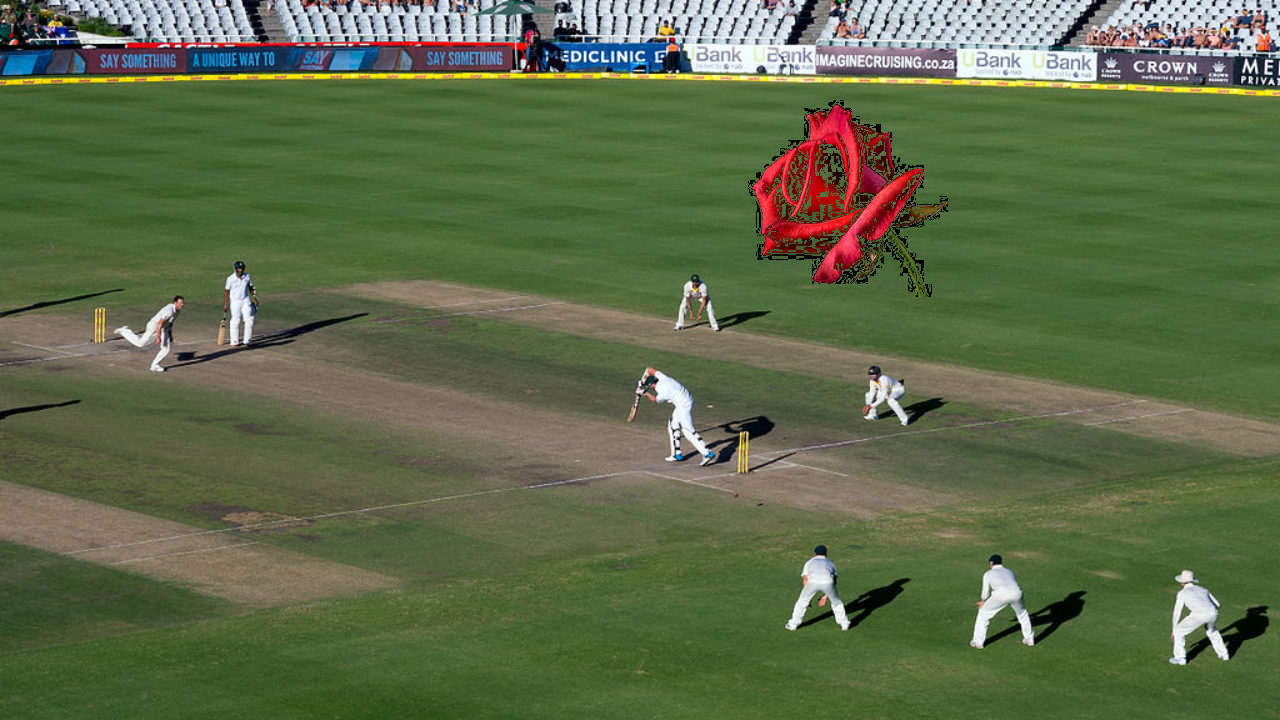

In [3]:
#chroma_keying
#rose
rose=cv2.imread('rose.jpeg')
stadium=cv2.imread('stadium.jpg')

xstart=100
ystart=700
final=stadium
for i in range(rose.shape[0]):
  for j in range(rose.shape[1]):
    if(rose[i][j][0]==0&rose[i][j][1]==0&rose[i][j][2]==0):
      pass
    else:
      final[xstart+i][ystart+j]=rose[i][j]
cv2_imshow(final)

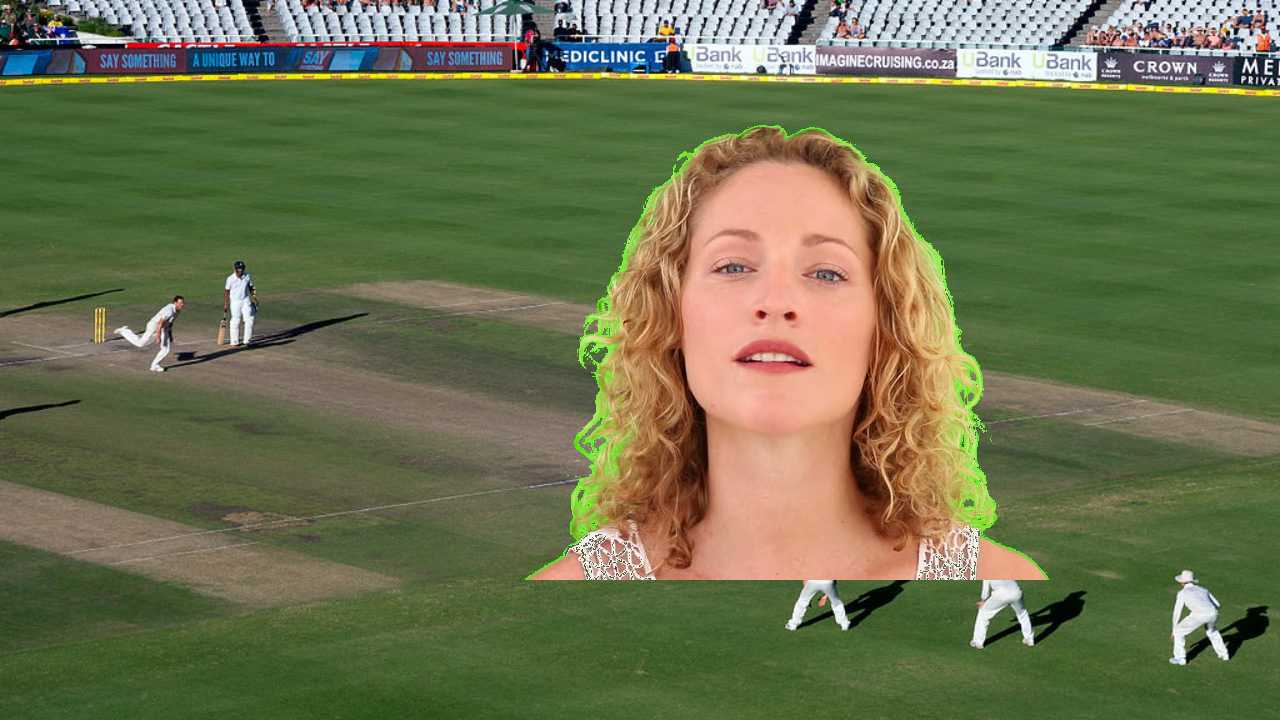

In [4]:
#chroma_img
stadium=cv2.imread('stadium.jpg')
chroma=cv2.imread('chroma_img.jpg')
xstart=100
ystart=500
final=stadium
for i in range(chroma.shape[0]):
  for j in range(chroma.shape[1]):
    if(chroma[i][j][1]>245):
      pass
    else:
      final[xstart+i][ystart+j]=chroma[i][j]
cv2_imshow(final)

[[  0.64594224   0.76338629 -15.66421345]
 [ -0.76338629   0.64594224  78.22628531]]


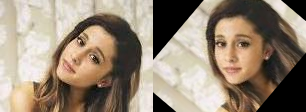

In [5]:
# face straightening
def getAngle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang
face= cv2.imread('tilted_face.jpg')
m=cv2.getRotationMatrix2D((face.shape[1]/2,face.shape[0]/2),getAngle([77,37],[116,70],[116,30]),1)
print(m)
face_straight=cv2.warpAffine(face,m,(face.shape[1],face.shape[0]))
cv2_imshow(np.hstack([face,face_straight]))

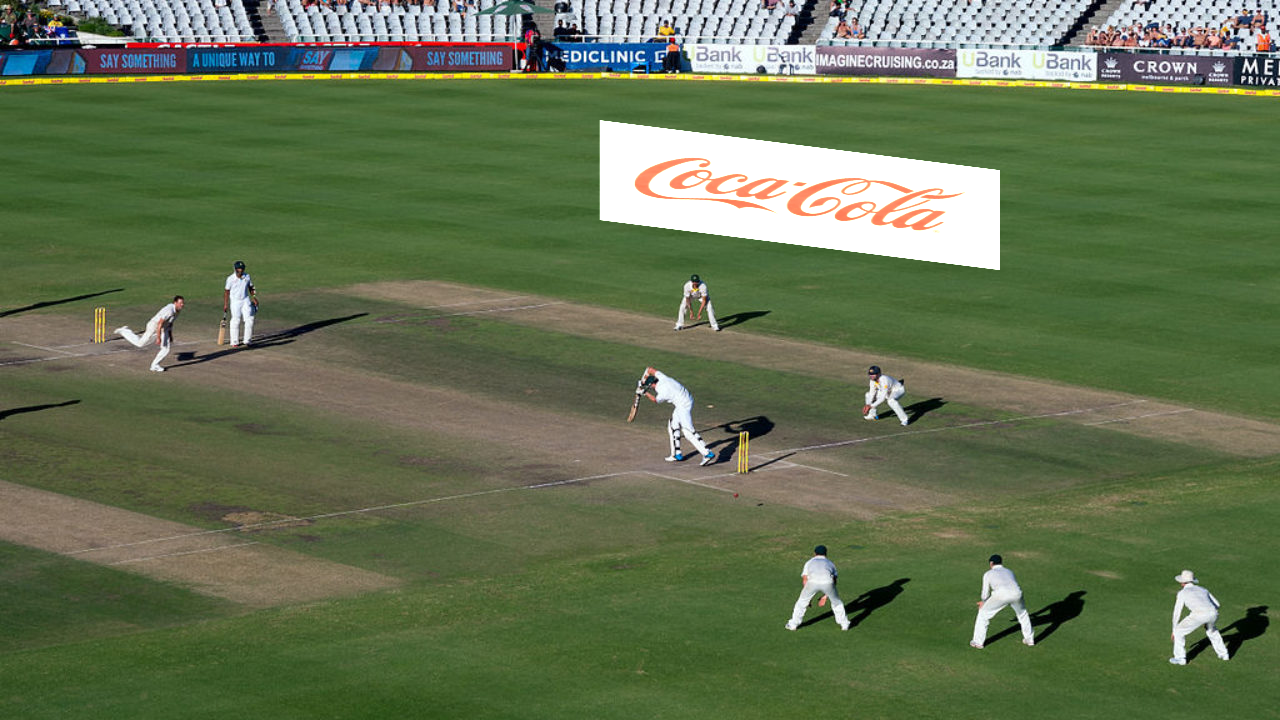

In [6]:
#HW: Perspective Transformation: Put the banner of coco-cola on the field. Experiment with these functions and show some interesting results.
pts1 = np.float32([[0,0],[0,179],[320, 0],[320,179]]) # cola coords 
pts2 = np.float32([[600,120],[600, 220],[1000, 170],[1000, 270]]) # stadium tile coords
coca=cv2.imread('coca.jpg')
stadium=cv2.imread('stadium.jpg')
m,status=cv2.findHomography(pts1,pts2)
cocatransform=cv2.warpPerspective(coca,m,(stadium.shape[1],stadium.shape[0]))
final=cv2.add(stadium,cocatransform)
cv2_imshow(final)